In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
import yfinance as yf

---

In [3]:
# Download 3 months of historical data using the daily time frame
petr = yf.download("PETR4.SA", start = "2022-06-01", end = "2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [4]:
petr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-01,29.900000,30.330000,29.850000,30.020000,21.388075,46353200
2022-06-02,29.969999,30.049999,29.549999,29.760000,21.202833,50738300
2022-06-03,29.709999,30.440001,29.530001,30.280001,21.573315,60396900
2022-06-06,30.500000,30.530001,29.910000,30.299999,21.587563,39213900
2022-06-07,30.190001,31.299999,30.160000,30.660000,21.844048,80333700
...,...,...,...,...,...,...
2022-12-23,24.129999,25.219999,24.129999,25.120001,25.120001,68387900
2022-12-26,25.120001,25.299999,24.820000,24.940001,24.940001,28765200
2022-12-27,25.250000,25.309999,24.549999,25.110001,25.110001,50803200


In [5]:
petr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 147 entries, 2022-06-01 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       147 non-null    float64
 1   High       147 non-null    float64
 2   Low        147 non-null    float64
 3   Close      147 non-null    float64
 4   Adj Close  147 non-null    float64
 5   Volume     147 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 8.0 KB


In [6]:
petr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,147.000000,147.000000,147.000000,147.000000,147.000000,1.470000e+02
mean,29.618027,30.186395,29.061360,29.648503,24.819724,8.638732e+07
std,3.642011,3.683265,3.604563,3.646897,3.384565,4.189429e+07
min,21.000000,22.110001,20.770000,21.469999,18.730595,2.876520e+07
25%,27.090000,27.775001,26.469999,27.110000,21.790613,5.811710e+07
50%,29.719999,30.330000,29.240000,29.760000,24.780001,7.425280e+07
75%,32.549999,33.135000,31.760000,32.559999,27.757716,1.039871e+08
max,37.650002,38.389999,36.849998,37.720001,33.003029,3.195016e+08


In [7]:
petr.index

DatetimeIndex(['2022-06-01', '2022-06-02', '2022-06-03', '2022-06-06',
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-13', '2022-06-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-26', '2022-12-27',
               '2022-12-28', '2022-12-29'],
              dtype='datetime64[ns]', name='Date', length=147, freq=None)

In [9]:
# Aqui você consegue escolher quais os períodos da MME
MME_Rápida = 5
MME_Lenta = 8

# Aqui é de fato a criação da MME
MME_1 = petr['Close'].ewm(span = MME_Rápida, adjust = False).mean()
MME_2 = petr['Close'].ewm(span = MME_Lenta, adjust = False).mean()

In [10]:
# Caso queira criar uma MMS
# petr['Close'].rolling(window=20).mean().head(50)

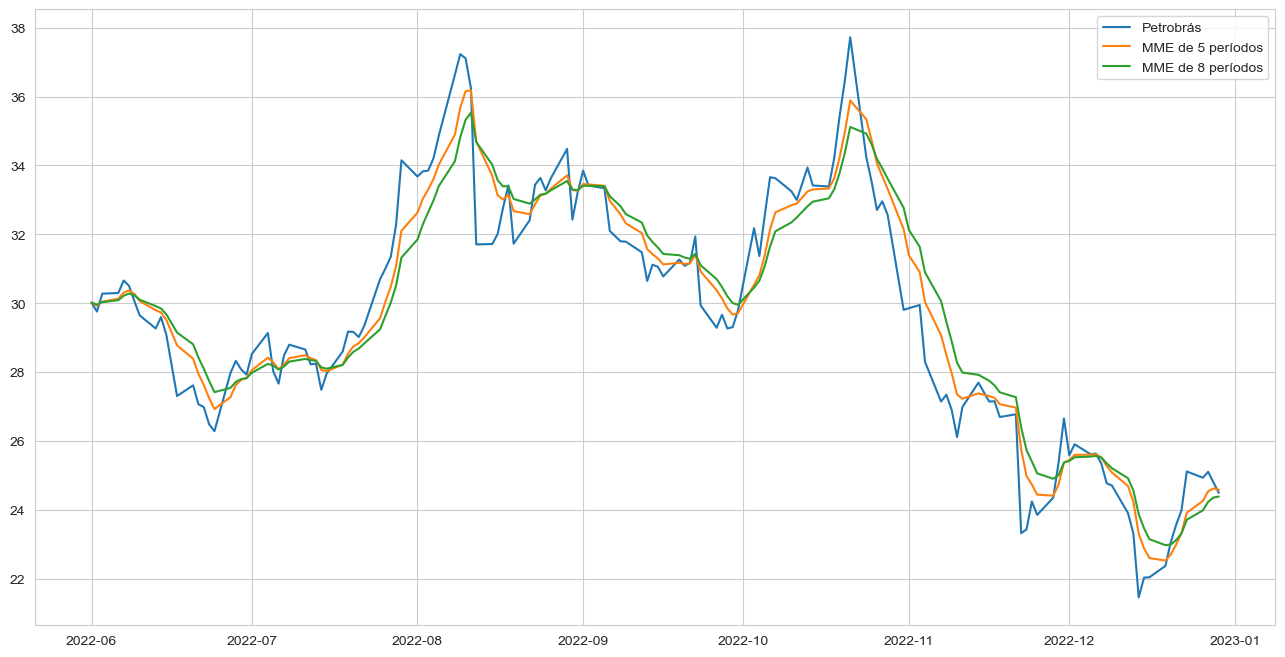

In [11]:
# Visualizando o gráfico do período escolhido com as Médias Móveis Exponenciais
plt.figure(figsize=(16, 8))
plt.plot(petr['Close'], label = 'Petrobrás')
plt.plot(MME_1, label = 'MME de 5 períodos')
plt.plot(MME_2, label = 'MME de 8 períodos') 

plt.legend()

In [14]:
# Criando colunas com os valores das Médias Móveis
petr['MME_1'] = MME_1
petr['MME_2'] = MME_2

In [15]:
# Criando indicadores de compra ou venda de acordo com o cruzamento das MME
def cruzamento(df):
    sinal_compra = []
    sinal_venda = []
    flag = 0
    
    for i in range(0, len(df)):
        if df['MME_1'][i] > df['MME_2'][i]:
            if flag != 1:
                sinal_compra.append(df['Close'][i])
                sinal_venda.append(np.nan)
                flag = 1
            else:
                sinal_compra.append(np.nan)
                sinal_venda.append(np.nan)
        elif df['MME_2'][i] > df['MME_1'][i]:
            if flag != 2:
                sinal_compra.append(np.nan)
                sinal_venda.append(df['Close'][i])
                flag = 2
            else:
                sinal_compra.append(np.nan)
                sinal_venda.append(np.nan)
        else:
            sinal_compra.append(np.nan)
            sinal_venda.append(np.nan)
    return (sinal_compra, sinal_venda)

In [18]:
len(cruzamento(petr))

2

In [19]:
petr['Sinal_Compra'] = cruzamento(petr)[0]
petr['Sinal_Venda'] = cruzamento(petr)[1]

In [20]:
petr.head()

,Open,High,Low,Close,Adj Close,Volume,MME_1,MME_2,Sinal_Compra,Sinal_Venda
Date,,,,,,,,,,
2022-06-01,29.900000,30.330000,29.850000,30.020000,21.388075,46353200,30.020000,30.020000,NaN,NaN
2022-06-02,29.969999,30.049999,29.549999,29.760000,21.202833,50738300,29.933334,29.962223,NaN,29.76
2022-06-03,29.709999,30.440001,29.530001,30.280001,21.573315,60396900,30.048889,30.032840,30.280001,NaN
2022-06-06,30.500000,30.530001,29.910000,30.299999,21.587563,39213900,30.132593,30.092209,NaN,NaN
2022-06-07,30.190001,31.299999,30.160000,30.660000,21.844048,80333700,30.308395,30.218385,NaN,NaN


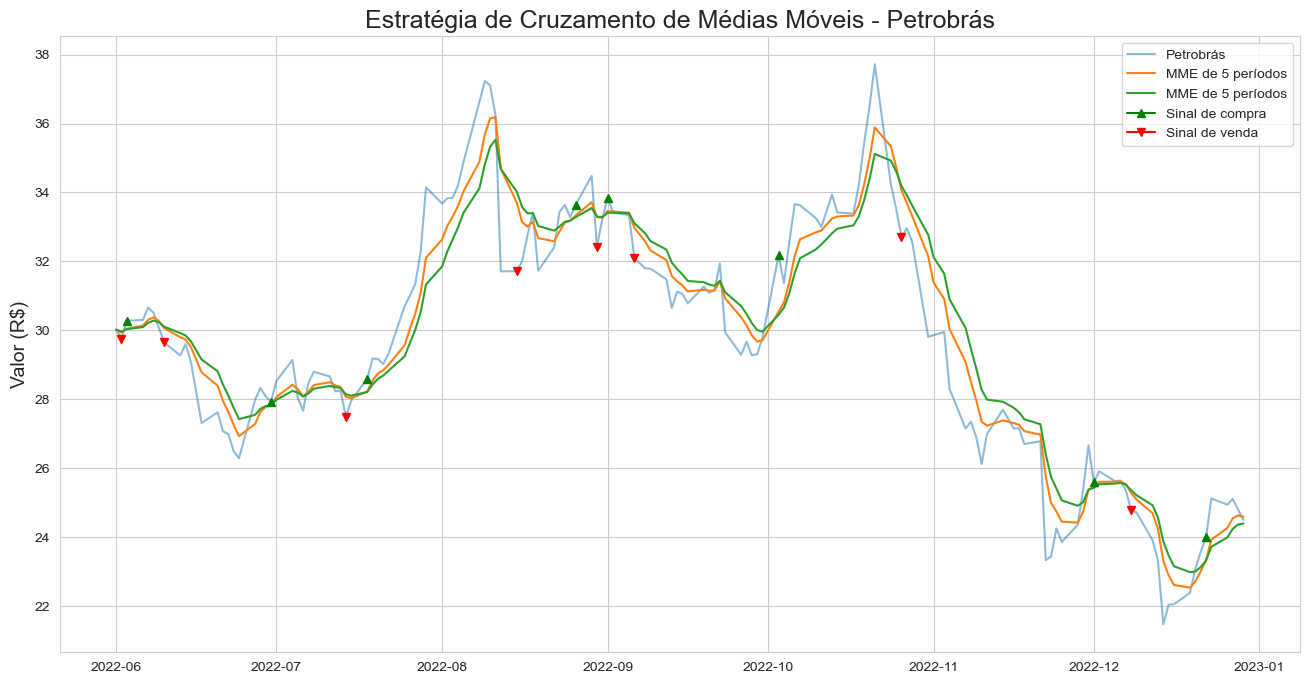

In [21]:
plt.figure(figsize=(16,8))
plt.plot(petr['Close'], label = 'Petrobrás', alpha = 0.5)
plt.plot(petr['MME_1'], label = 'MME de 5 períodos') 
plt.plot(petr['MME_2'], label = 'MME de 5 períodos')
plt.plot(petr['Sinal_Compra'], marker = '^', color = 'green', label = 'Sinal de compra')
plt.plot(petr['Sinal_Venda'], marker = 'v', color = 'red', label = 'Sinal de venda')

plt.title('Estratégia de Cruzamento de Médias Móveis - Petrobrás', fontsize = 18)
plt.ylabel('Valor (R$)', fontsize = 14)
plt.legend()